In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
symbols = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'

img_width = 140
img_height = 80
n_class = len(symbols) # len(symbols) == 36
num_char = 4

# Data generator

In [3]:
from captcha.image import ImageCaptcha
import random

def gen(batch_size=64, save_img = False, save_dir = ''):
    X = np.empty((batch_size, img_height, img_width, 3), dtype=np.uint8)
    Y = [np.empty((batch_size, n_class), dtype=np.uint8) for i in range(num_char)]
    generator = ImageCaptcha(width=img_width, height=img_height)
    while True:
        for i in range(batch_size):
            random_str = ''.join(random.sample(symbols, num_char))
            img = generator.generate_image(random_str)
            if save_img == True:
                plt.imsave(save_dir+random_str+".jpg",np.array(img))
            X[i] = img
            for digit, ch in enumerate(random_str):
                Y[digit][i, :] = 0
                Y[digit][i, symbols.find(ch)] = 1
        yield X, Y
        
# Decoder
def decode(y):
    y = np.argmax(np.array(y), axis=2)[:,0]
    return ''.join([symbols[c] for c in y])

# Test

(-0.5, 139.5, 79.5, -0.5)

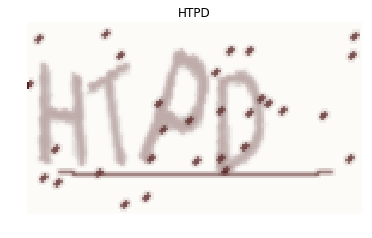

In [4]:
(X, y) = next(gen(1))
plt.imshow(X[0])
plt.title(decode(y))
plt.axis('off')

# CNN

In [5]:
from keras.models import *
from keras.layers import *

input_layer = Input(shape = (img_height, img_width, 3))
layers = Conv2D(32, (3, 3), activation='relu')(input_layer)
layers = Conv2D(32, (3, 3), activation='relu')(layers)
layers = MaxPooling2D((2, 2))(layers)

layers = Conv2D(64, (3, 3), activation='relu')(layers)
layers = Conv2D(64, (3, 3), activation='relu')(layers)
layers = MaxPooling2D((2, 2))(layers)

layers = Conv2D(128, (3, 3), activation='relu')(layers)
layers = Conv2D(128, (3, 3), activation='relu')(layers)
layers = MaxPooling2D((2, 2))(layers)

layers = Conv2D(256, (3, 3), activation='relu')(layers)
layers = Conv2D(256, (3, 3), activation='relu')(layers)
layers = MaxPooling2D((2, 2))(layers)

layers = Flatten()(layers)
layers = Dropout(0.2)(layers)
output_layers = [Dense(n_class, activation='softmax',  name='digit_%d'%i)(layers) for i in range(4)]

model = Model(inputs = input_layer, outputs = output_layers)

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

c:\users\zhongzhu\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Training

In [6]:
batch_size = 256
samples =64000
val_samples = 1024
h = model.fit_generator(gen(batch_size = batch_size), steps_per_epoch = samples/batch_size, epochs=20,
                        validation_data=gen(batch_size = batch_size), validation_steps = val_samples/batch_size, 
                        verbose = 2)

Epoch 1/20
 - 161s - loss: 14.4393 - digit_0_loss: 3.6121 - digit_1_loss: 3.6084 - digit_2_loss: 3.6133 - digit_3_loss: 3.6056 - digit_0_acc: 0.0298 - digit_1_acc: 0.0330 - digit_2_acc: 0.0334 - digit_3_acc: 0.0327 - val_loss: 14.1523 - val_digit_0_loss: 3.5784 - val_digit_1_loss: 3.5265 - val_digit_2_loss: 3.5177 - val_digit_3_loss: 3.5297 - val_digit_0_acc: 0.0322 - val_digit_1_acc: 0.0498 - val_digit_2_acc: 0.0459 - val_digit_3_acc: 0.0469
Epoch 2/20
 - 155s - loss: 8.9180 - digit_0_loss: 2.7708 - digit_1_loss: 1.9531 - digit_2_loss: 2.0999 - digit_3_loss: 2.0942 - digit_0_acc: 0.2367 - digit_1_acc: 0.4407 - digit_2_acc: 0.4024 - digit_3_acc: 0.4074 - val_loss: 3.4777 - val_digit_0_loss: 1.0451 - val_digit_1_loss: 0.7434 - val_digit_2_loss: 0.8516 - val_digit_3_loss: 0.8378 - val_digit_0_acc: 0.7109 - val_digit_1_acc: 0.8135 - val_digit_2_acc: 0.7754 - val_digit_3_acc: 0.7969
Epoch 3/20
 - 155s - loss: 2.2635 - digit_0_loss: 0.6842 - digit_1_loss: 0.4538 - digit_2_loss: 0.5672 - dig

Epoch 20/20
 - 155s - loss: 0.6796 - digit_0_loss: 0.1667 - digit_1_loss: 0.1658 - digit_2_loss: 0.1721 - digit_3_loss: 0.1750 - digit_0_acc: 0.9805 - digit_1_acc: 0.9789 - digit_2_acc: 0.9775 - digit_3_acc: 0.9779 - val_loss: 1.1760 - val_digit_0_loss: 0.2510 - val_digit_1_loss: 0.3234 - val_digit_2_loss: 0.2955 - val_digit_3_loss: 0.3061 - val_digit_0_acc: 0.9756 - val_digit_1_acc: 0.9658 - val_digit_2_acc: 0.9668 - val_digit_3_acc: 0.9678


In [7]:
h.history

{'digit_0_acc': [0.02978125,
  0.23671875,
  0.80646875,
  0.927359375,
  0.94734375,
  0.9605,
  0.962078125,
  0.964609375,
  0.967890625,
  0.969671875,
  0.969640625,
  0.970796875,
  0.974671875,
  0.974765625,
  0.975890625,
  0.97546875,
  0.975703125,
  0.97675,
  0.976109375,
  0.980453125],
 'digit_0_loss': [3.6121001625061036,
  2.770836485862732,
  0.6842043894529343,
  0.3281490262448788,
  0.3151040983200073,
  0.24095696052908896,
  0.2695136757642031,
  0.2620929351449013,
  0.24669546726346017,
  0.23120902960002424,
  0.24225817535072566,
  0.23567036920785903,
  0.19634677039831877,
  0.2094311173558235,
  0.1908328199312091,
  0.20799026934057474,
  0.2008070713020861,
  0.19440658996254206,
  0.1979382007904351,
  0.16672664640471338],
 'digit_1_acc': [0.033,
  0.440703125,
  0.885453125,
  0.94771875,
  0.9545625,
  0.963953125,
  0.963109375,
  0.964671875,
  0.965578125,
  0.9693125,
  0.969796875,
  0.9699375,
  0.973625,
  0.971953125,
  0.975578125,
  0.97381

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'Accuracy')

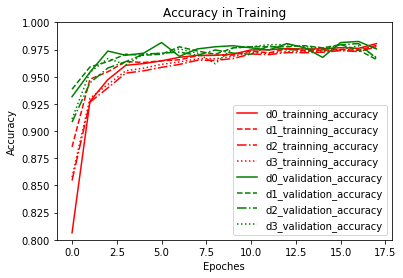

In [15]:
%pylab inline
pt0 = h.history['digit_0_acc']
pt1 = h.history['digit_1_acc']
pt2 = h.history['digit_2_acc']
pt3 = h.history['digit_3_acc']
pv0 = h.history['val_digit_0_acc']
pv1 = h.history['val_digit_1_acc']
pv2 = h.history['val_digit_2_acc']
pv3 = h.history['val_digit_3_acc']
plot(pt0[2:], 'r-', label='d0_trainning_accuracy')
plot(pt1[2:], 'r--', label='d1_trainning_accuracy')
plot(pt2[2:], 'r-.', label='d2_trainning_accuracy')
plot(pt3[2:], 'r:', label='d3_trainning_accuracy')
plot(pv0[2:], 'g-', label='d0_validation_accuracy')
plot(pv1[2:], 'g--', label='d1_validation_accuracy')
plot(pv2[2:], 'g-.', label='d2_validation_accuracy')
plot(pv3[2:], 'g:', label='d3_validation_accuracy')
pylab.legend()
pylab.ylim(0.8, 1)
title('Accuracy in Training')
xlabel('Epoches')
ylabel('Accuracy')

# Testing accuracy of trained model

In [11]:
import random
def evaluate(model, test_num=1000):
    correct = 0
    generator = gen(1, save_img = False, save_dir = 'test_img/')
    for i in range(test_num):
        X, y = next(generator)
        y_predict = model.predict(X)
        y = decode(y)
        y_predict = decode(y_predict)
        #print(y, y_pred)
        if y == y_predict:
            correct += 1
        else:
            print(y, y_predict) #print wrong prediction
    return correct / test_num

test_acc = evaluate(model)
print(test_acc)

0TQK OTQK
JVOG JV0G
1OTM 10TM
O4MQ 04MQ
KGNH KGMH
OBY7 0BY7
294O 2940
L90P L9OP
UOH0 U0H0
0L4R OL4R
9OD2 90D2
53QO 53Q0
CNO2 CN02
AUNO AUN0
EJ20 EJ2O
LWO3 LW03
FH9J FH9U
7OWM 70WM
0146 O146
08VX O8VX
G7OD G70D
GQ0J GQOJ
GKOW GK0W
OKX7 0KX7
IOPN I0PN
9R8O 9R80
60UT 6OUT
0OAM OOAM
PL0B PLOB
0.971


# Test Sample

(-0.5, 139.5, 79.5, -0.5)

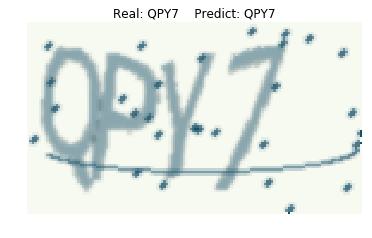

In [12]:
X, y = next(gen(1))
y_pred = model.predict(X)
plt.title('Real: %s    Predict: %s'%(decode(y), decode(y_pred)))
plt.imshow(X[0], cmap='gray')
plt.axis('off')

# Save/Load model

In [13]:
model.save('trained_model2.h5')

In [3]:
from keras.models import load_model
model = load_model('trained_cnn.h5')

c:\users\zhongzhu\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
